# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [18]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')
df=pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
schema_df=pd.read_csv('schema.csv')
mini_df = pd.concat([df['FormalEducation'], df['AdjustedCompensation']], axis=1)
mini_df_clean=mini_df[df.FormalEducation.notnull()]
mini_df_clean=mini_df[df.AdjustedCompensation.notnull()]

mini_df_clean

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.0000
8,Bachelor's degree,64184.8000
9,Bachelor's degree,20882.4000
11,Bachelor's degree,1483.9000
14,Master's degree,36634.4000
21,Bachelor's degree,20000.0000
22,Doctoral degree,100000.0000
23,Some college/university study without earning ...,916.4000
25,Bachelor's degree,10858.8480
27,Master's degree,53352.0000


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

This is the Welch_T test: 4.847007852132032
This is the Welch_df test: 2248.8683244377144
This is the one_sided p_value test: 6.694760974479408e-07
Summary description of the two series:
Mean:	Masters: 63756.86	Bachelors 53744.35
Median:	Masters: 53445.86	Bachelors 38292.15
Sample Size:	Masters: 1984	Bachelors 1103


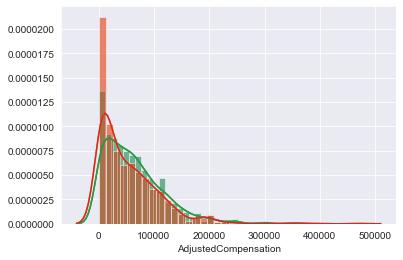

In [51]:
#Your code here
import flatiron_stats as flt
masters = mini_df_clean.loc[df['FormalEducation'] == "Master's degree", 'AdjustedCompensation']
masters = masters[masters<500000]
bachelors = mini_df_clean.loc[df['FormalEducation'] == "Bachelor's degree", 'AdjustedCompensation']
bachelors = bachelors[bachelors<500000]
print("This is the Welch_T test:",flt.welch_t(masters, bachelors))
print("This is the Welch_df test:", flt.welch_df(masters, bachelors))
print("This is the one_sided p_value test:", flt.p_value_welch_ttest(masters,bachelors, two_sided=False))
stats.ttest_ind(masters,bachelors,equal_var=False)
sns.distplot(masters)
sns.distplot(bachelors)
a1 = "Masters"
b1 = "Bachelors"

print("Summary description of the two series:")
print("Mean:\t{}: {}\t{} {}".format(a1,round(masters.mean(),2),b1,round(bachelors.mean(),2)))
print("Median:\t{}: {}\t{} {}".format(a1,round(masters.median(),2),b1,round(bachelors.median(),2)))
print("Sample Size:\t{}: {}\t{} {}".format(a1,len(masters),b1,len(bachelors)))

masters.astype('int64').value_counts().sort_values()
import seaborn as sns
sns.distplot(masters)
sns.distplot(bachelors)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

This is the Welch_T test: 1.0081234695549781
This is the Welch_df test: 966.0001919995985
This is the one_sided p_value test: 0.1568238199472023
Summary description of the two series:
Mean:	Doctorate: 29566175.76	Bachelors 64887.1
Median:	Doctorate: 74131.92	Bachelors 38399.4
Sample Size:	Doctorate: 967	Bachelors 1107
This is the Welch_T test: 12.098472655425818
This is the Welch_df test: 1896.9589331289899
This is the one_sided p_value test: 0.0

 Summary description of the two series removing outliers:
Mean:	Doctorate: 86194.98	Bachelors 53744.35
Median:	Doctorate: 73152.77	Bachelors 38292.15
Sample Size:	Doctorate: 964	Bachelors 1103


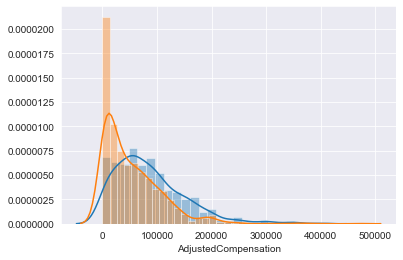

In [52]:
#Your code here
import flatiron_stats as flt
doctorate = mini_df_clean.loc[df['FormalEducation'] == "Doctoral degree", 'AdjustedCompensation']
doctorate_o = doctorate[doctorate<500000]
bachelors = mini_df_clean.loc[df['FormalEducation'] == "Bachelor's degree", 'AdjustedCompensation']
bachelors_o = bachelors[bachelors<500000]
print("This is the Welch_T test:",flt.welch_t(doctorate, bachelors))
print("This is the Welch_df test:", flt.welch_df(doctorate, bachelors))
print("This is the one_sided p_value test:", flt.p_value_welch_ttest(doctorate,bachelors, two_sided=False))
stats.ttest_ind(doctorate,bachelors,equal_var=False)

a1 = "Doctorate"
b1 = "Bachelors"

print("Summary description of the two series:")
print("Mean:\t{}: {}\t{} {}".format(a1,round(doctorate.mean(),2),b1,round(bachelors.mean(),2)))
print("Median:\t{}: {}\t{} {}".format(a1,round(doctorate.median(),2),b1,round(bachelors.median(),2)))
print("Sample Size:\t{}: {}\t{} {}".format(a1,len(doctorate),b1,len(bachelors)))

print("This is the Welch_T test:",flt.welch_t(doctorate_o, bachelors_o))
print("This is the Welch_df test:", flt.welch_df(doctorate_o, bachelors_o))
print("This is the one_sided p_value test:", flt.p_value_welch_ttest(doctorate_o,bachelors_o, two_sided=False))
stats.ttest_ind(doctorate_o,bachelors_o,equal_var=False)
sns.distplot(doctorate_o)
sns.distplot(bachelors_o)
a1 = "Doctorate"
b1 = "Bachelors"
print("\n Summary description of the two series removing outliers:")
print("Mean:\t{}: {}\t{} {}".format(a1,round(doctorate_o.mean(),2),b1,round(bachelors_o.mean(),2)))
print("Median:\t{}: {}\t{} {}".format(a1,round(doctorate_o.median(),2),b1,round(bachelors_o.median(),2)))
print("Sample Size:\t{}: {}\t{} {}".format(a1,len(doctorate_o),b1,len(bachelors_o)))

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [54]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, mini_df_clean).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
temp = mini_df_clean[mini_df_clean]

,sum_sq,df,F,PR(>F)
C(FormalEducation),6.540294e+17,6.0,0.590714,0.738044
Residual,7.999414e+20,4335.0,NaN,NaN


In [ ]:
                        sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN
temp = df[df[f2]<=5*10**5]
formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!